In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1)
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

import warnings
warnings.simplefilter("ignore")

In [2]:
from wordcloud import WordCloud, ImageColorGenerator

## 국제축구경기 데이터

- 1872 ~ 2018 년까지 전세계에서 개최된 국제 축구대회

### 데이터 로드

In [3]:
soccer = pd.read_csv("../../data/dataset/soccer.csv")

### 데이터 탐색

In [4]:
soccer.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
soccer.shape

(41540, 9)

In [6]:
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41540 entries, 0 to 41539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41540 non-null  object
 1   home_team   41540 non-null  object
 2   away_team   41540 non-null  object
 3   home_score  41540 non-null  int64 
 4   away_score  41540 non-null  int64 
 5   tournament  41540 non-null  object
 6   city        41540 non-null  object
 7   country     41540 non-null  object
 8   neutral     41540 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [7]:
soccer.describe()

,home_score,away_score
count,41540.000000,41540.000000
mean,1.745643,1.187819
std,1.753444,1.405511
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [8]:
soccer.describe(include=object)

,date,home_team,away_team,tournament,city,country
count,41540,41540,41540,41540,41540,41540
unique,15173,309,306,112,2012,266
top,2012-02-29,Brazil,Uruguay,Friendly,Kuala Lumpur,United States
freq,66,568,541,17036,589,1154


### 날짜 데이터 타입 변경 ( object ==> datetime )

In [9]:
soccer['date'] = pd.to_datetime(soccer['date'])

### 날짜 데이터 순으로 내림차순 정렬

In [10]:
soccer.sort_values('date', ascending=False, inplace=True)

### 홈경기와 원정경기의 득점 합 득점 차 결과를 새로운 컬럼으로 생성

In [11]:
# score_sum = home_score + away_score
soccer['score_sum'] = soccer['home_score'] + soccer['away_score']

In [12]:
# score_diff = home_score - away_score
soccer['score_diff'] = abs(soccer['home_score'] - soccer['away_score'])

In [13]:
soccer.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff
41539,2019-11-19,Lebanon,North Korea,0,0,FIFA World Cup qualification,Beirut,Lebanon,False,0,0
41517,2019-11-19,U.S. Virgin Islands,Saint Martin,1,2,CONCACAF Nations League,Upper Bethlehem,U.S. Virgin Islands,False,3,1
41515,2019-11-19,Saint Lucia,Montserrat,0,1,CONCACAF Nations League,Gros Islet,Saint Lucia,False,1,1
41514,2019-11-19,El Salvador,Dominican Republic,2,0,CONCACAF Nations League,San Salvador,El Salvador,False,2,2
41513,2019-11-19,Mexico,Bermuda,2,1,CONCACAF Nations League,Mexico City,Mexico,False,3,1


#### 숫자 컬럼들 간의 상관관계

In [14]:
soccer.corr()

,home_score,away_score,neutral,score_sum,score_diff
home_score,1.000000,-0.135921,-0.032086,0.746540,0.637261
away_score,-0.135921,1.000000,0.084924,0.557696,0.241095
neutral,-0.032086,0.084924,1.000000,0.030151,0.025847
score_sum,0.746540,0.557696,0.030151,1.000000,0.695824
score_diff,0.637261,0.241095,0.025847,0.695824,1.000000


<AxesSubplot:>

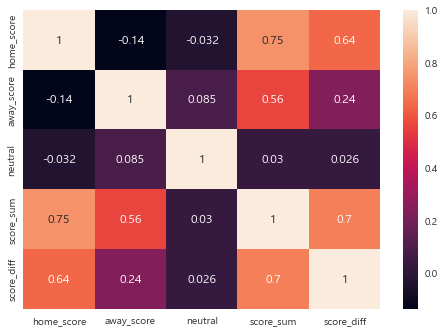

In [15]:
sns.heatmap(soccer.corr(), annot=True)

### 홈경기와 원정경기 중 최대골과 최소골 표시

In [16]:
# formal_score = max(home_score, away_score) - min(home_score, away_score)

def formal_score(df):
    max_score = max(df['home_score'], df['away_score'])
    min_score = min(df['home_score'], df['away_score'])
    
    return f"{max_score}-{min_score}"

In [17]:
soccer['formal_score'] = soccer.apply(formal_score, axis=1)

### 원정팀이 방문했던 경기에서 홈팀이 획득한 점수 

In [18]:
away_home_score = soccer.groupby('away_team')[['home_score']].sum()

In [19]:
away_home_score30 = away_home_score.sort_values('home_score', ascending=False).head(30)

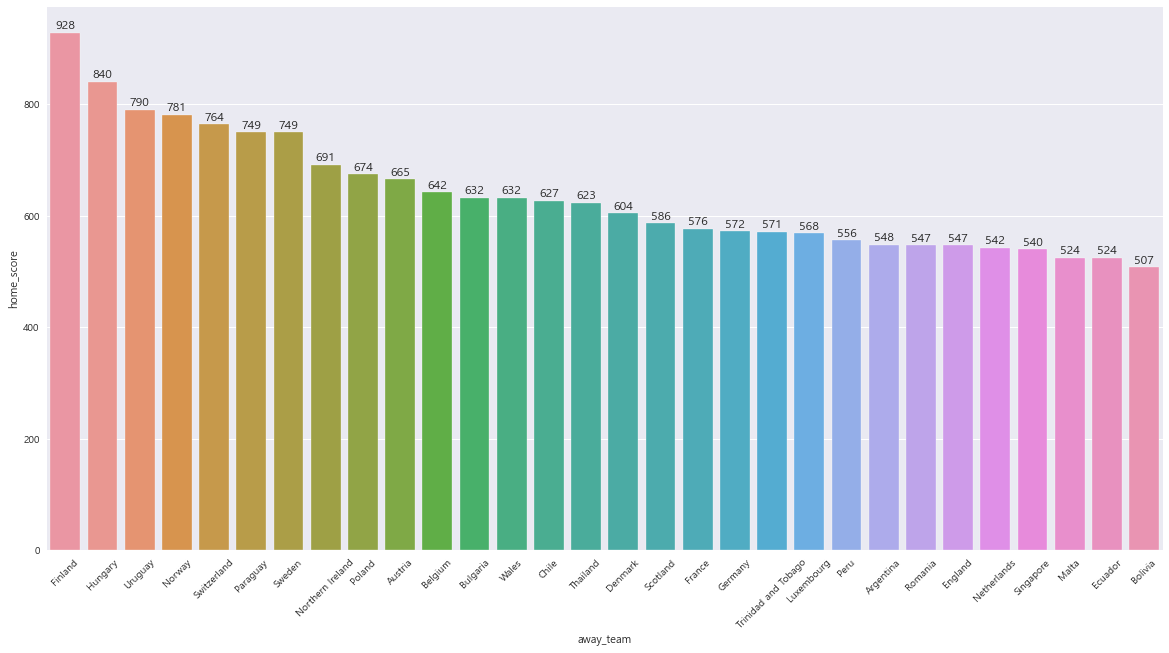

In [20]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=away_home_score30, x=away_home_score30.index, y='home_score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


for c in ax.containers:
    ax.bar_label(c, label_type='edge', padding=1)

In [21]:
soccer['tournament'].value_counts()

Friendly                                17036
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
OSN Cup                                     4
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Copa América qualification                  2
Name: tournament, Length: 112, dtype: int64

In [22]:
cups_name = " ".join(cups for cups in soccer['tournament'])

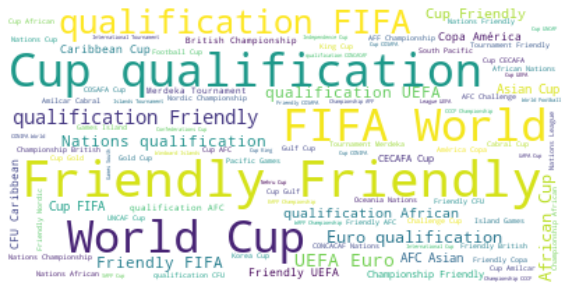

In [23]:
wc = WordCloud(background_color='white')
wc.generate(cups_name)

plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

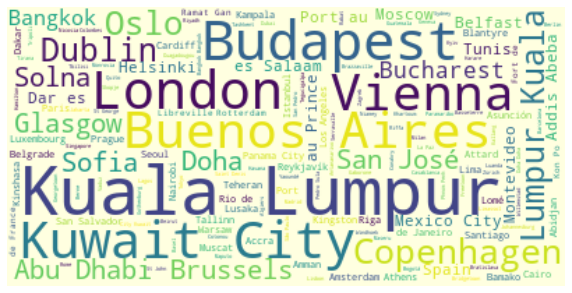

In [24]:
city_name = " ".join(cups for cups in soccer['city'])

wc = WordCloud(background_color='lightyellow')
wc.generate(city_name)

plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

### 국제대회 종류 / 종류별 개최 횟수

In [25]:
soccer['tournament'].nunique()

112

In [26]:
soccer['tournament'].value_counts()

Friendly                                17036
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
OSN Cup                                     4
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Copa América qualification                  2
Name: tournament, Length: 112, dtype: int64

### 상위 10개 대회 종류와 개체 횟수 시각화

<AxesSubplot:>

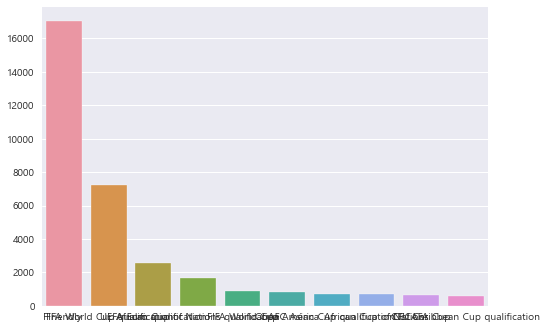

In [27]:
sns.barplot(x=soccer['tournament'].value_counts().index[:10], y=soccer['tournament'].value_counts().values[:10])

### 홈팀 득점에 대한 원정팀 득점 시각화

<AxesSubplot:xlabel='away_score', ylabel='home_score'>

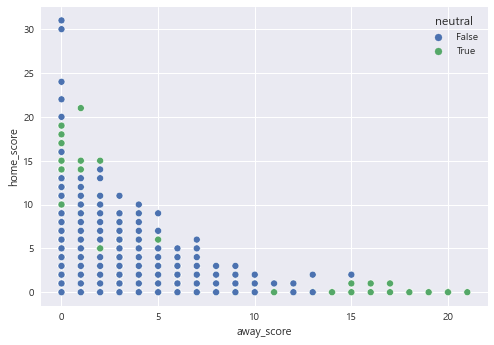

In [28]:
# scatter 
sns.scatterplot(x='away_score', y='home_score', data=soccer, hue='neutral')

### 홈팀 기준 대회 참가 횟수가 많은 10개국 

In [29]:
home_team_count = soccer['home_team'].value_counts()[:10]

<AxesSubplot:>

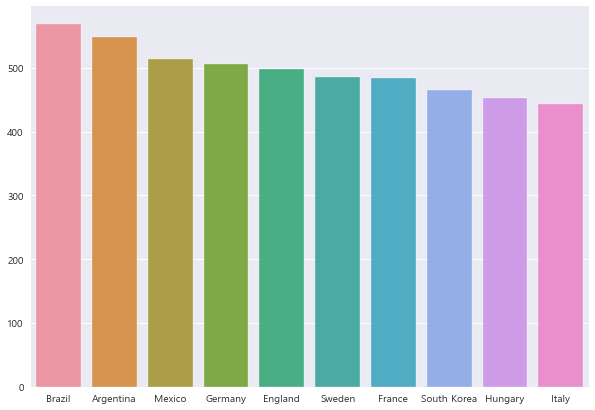

In [30]:
plt.figure(figsize=(10, 7))
sns.barplot(x=home_team_count.index, y=home_team_count.values)

### 대한민국 축구 국가 대표팀 경기 결과

In [31]:
# home_team 이 우리나라인 데이터 추출 후 새로운 데이터프레임 생성 ( korea )
korea = soccer[soccer['home_team'] == 'South Korea']
korea.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,formal_score
41221,2019-10-10,South Korea,Sri Lanka,8,0,FIFA World Cup qualification,Hwaseong,South Korea,False,8,8,8-0
40989,2019-09-05,South Korea,Georgia,2,2,Friendly,Istanbul,Turkey,True,4,0,2-2
40753,2019-06-11,South Korea,Iran,1,1,Friendly,Seoul,South Korea,False,2,0,1-1


In [32]:
# 우리나라와 시합했던 국가명 확인
korea['away_team'].unique()

array(['Sri Lanka', 'Georgia', 'Iran', 'Australia', 'Colombia', 'Bolivia',
       'Qatar', 'Bahrain', 'China PR', 'Philippines', 'Saudi Arabia',
       'Uzbekistan', 'Panama', 'Uruguay', 'Chile', 'Costa Rica',
       'Germany', 'Mexico', 'Senegal', 'Bosnia and Herzegovina',
       'Honduras', 'Serbia', 'Morocco', 'Syria', 'Canada', 'Lebanon',
       'Burma', 'Jamaica', 'Laos', 'North Korea', 'United Arab Emirates',
       'New Zealand', 'Iraq', 'Oman', 'Paraguay', 'Venezuela', 'Belgium',
       'Algeria', 'Tunisia', 'Switzerland', 'Mali', 'Brazil', 'Croatia',
       'Haiti', 'Peru', 'Japan', 'Zambia', 'Kuwait', 'Poland', 'Ghana',
       'India', 'Nigeria', 'Greece', 'Ecuador', 'Hong Kong', 'Jordan',
       'Turkmenistan', 'Netherlands', 'Chinese Taipei', 'Togo', 'Angola',
       'Sweden', 'Burkina Faso', 'Egypt', 'Maldives',
       'Trinidad and Tobago', 'Vietnam', 'Turkey', 'Bulgaria', 'Nepal',
       'Argentina', 'Spain', 'Italy', 'Portugal', 'United States',
       'France', 'Englan

### 대한민국과 경기했던 국가들의 득점 합과 실점합 리스트로 작성

In [33]:
all_away_team = korea['away_team'].unique()

In [38]:
all_away_team.sort()

In [39]:
# away_team list => away_score
away_team = []
# korea_team list => home_score
korea_team = []

for team in all_away_team:
    away_team.append(np.sum(korea[korea['away_team'] == team].away_score))
    korea_team.append(np.sum(korea[korea['away_team'] == team].home_score))

In [40]:
away_team[:10]

[4, 0, 1, 13, 4, 0, 3, 0, 3, 8]

In [41]:
korea_team[:10]

[2, 1, 0, 16, 28, 15, 1, 1, 3, 4]

### 대한민국과 경기한 국가명, 실점, 득점 리스트를 하나의 데이터프레임 생성 ( all_country )

In [47]:
all_country = pd.DataFrame([korea_team, away_team], columns=all_away_team, index=['korea', 'away'])
all_country

,Algeria,Angola,Argentina,Australia,Bahrain,Bangladesh,Belgium,Bolivia,Bosnia and Herzegovina,Brazil,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Vietnam Republic,Western Australia,Yemen,Yemen DPR,Yugoslavia,Zambia
korea,2,1,0,16,28,15,1,1,3,4,...,4,23,3,7,22,0,6,1,1,8
away,4,0,1,13,4,0,3,0,3,8,...,9,7,1,0,11,3,0,1,3,4


In [48]:
all_country.T

,korea,away
Algeria,2,4
Angola,1,0
Argentina,0,1
Australia,16,13
Bahrain,28,4
...,...,...
Western Australia,0,3
Yemen,6,0
Yemen DPR,1,1
Yugoslavia,1,3


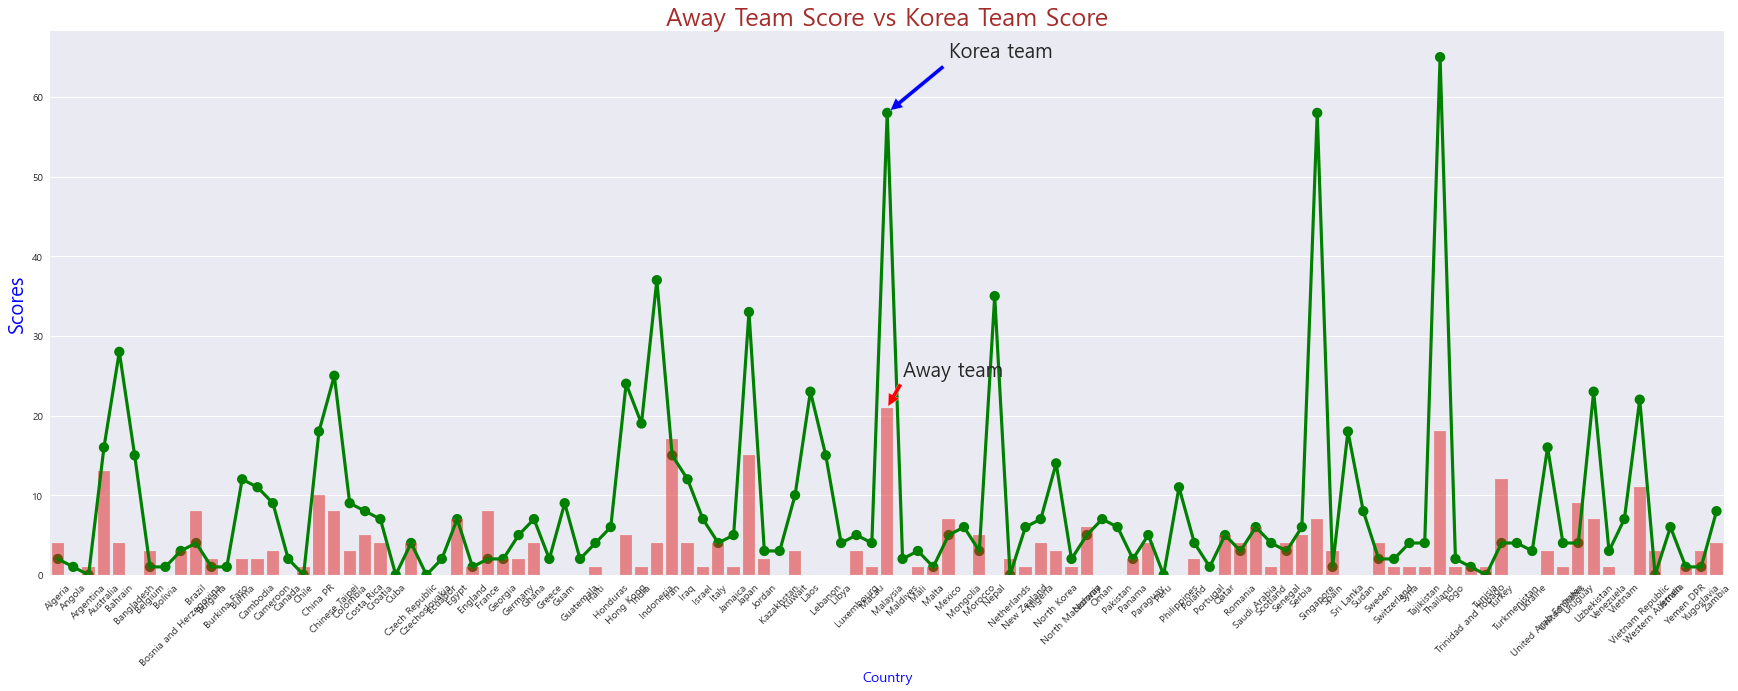

In [46]:
fig, ax = plt.subplots(figsize=(30, 10))

sns.pointplot(x=all_away_team, y=korea_team, color='green', alpha=0.5)
sns.barplot(x=all_away_team, y=away_team, color='red', alpha=0.5)

ax.annotate('Korea team', xy=(54, 58), xytext=(58, 65), fontsize=20, arrowprops=dict(facecolor='blue', shrink=0.05))

ax.annotate('Away team', xy=(54, 21), xytext=(55, 25), fontsize=20, arrowprops=dict(facecolor='red', shrink=0.05))

plt.xlabel("Country", fontsize=14, color="blue")
plt.xticks(rotation=45)

plt.ylabel("Scores", fontsize=20, color="blue")
plt.title("Away Team Score vs Korea Team Score", fontsize=25, color="brown")

plt.show()

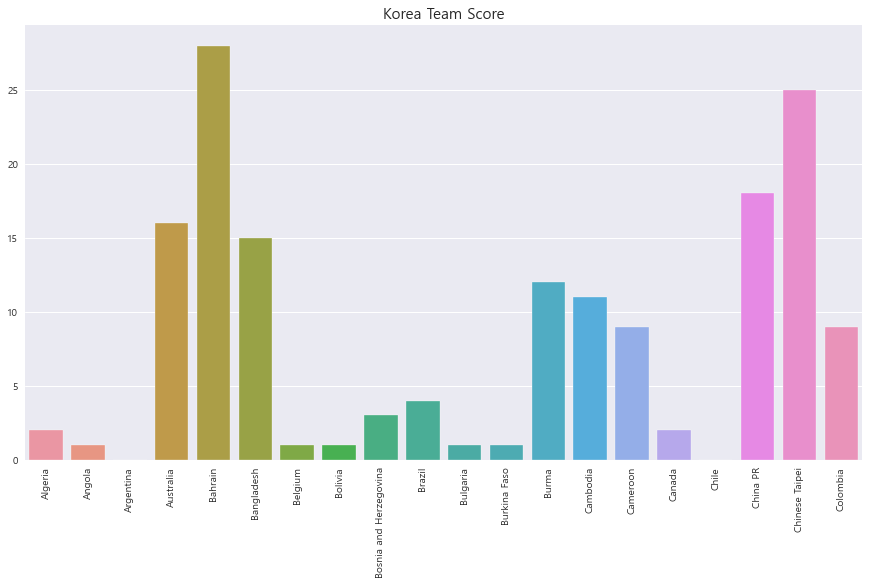

In [53]:
plt.figure(figsize=(15,8))
sns.barplot(x=all_away_team[:20], y=korea_team[:20])
plt.title('Korea Team Score', fontsize=15)
plt.xticks(rotation=90)
plt.show()

### 2009 ~ 2019 년까지 홈팀 대한민국 축구 국가대표팀과 원정팀 사이 경기에서 평균 득점
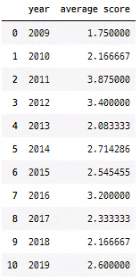

In [63]:
average_df = korea[['date', 'score_sum']].copy()

In [64]:
average_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 41221 to 3082
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       465 non-null    datetime64[ns]
 1   score_sum  465 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.9 KB


In [65]:
average_df['year'] = average_df['date'].dt.year

In [74]:
avg_goal = average_df[average_df['year'] >= 2009].groupby('year').mean().reset_index()
avg_goal

,year,score_sum
0,2009,1.750000
1,2010,2.166667
2,2011,3.875000
3,2012,3.400000
4,2013,2.083333
5,2014,2.714286
6,2015,2.545455
7,2016,3.200000
8,2017,2.333333
9,2018,2.166667


<AxesSubplot:xlabel='year', ylabel='score_sum'>

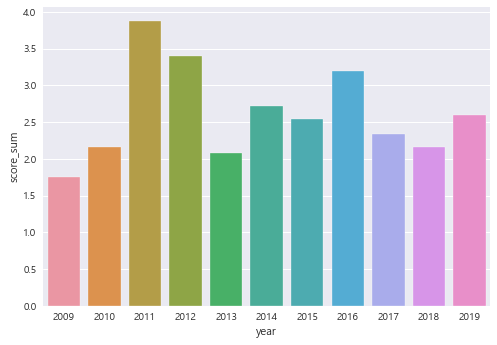

In [75]:
sns.barplot(data=avg_goal, x='year', y='score_sum')

### 5년간(2015 ~ 2019) 대한민국 대표팀의 국제경기 결과 확인

In [76]:
korea['year'] = korea['date'].dt.year

In [77]:
korea.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,formal_score,year
41221,2019-10-10,South Korea,Sri Lanka,8,0,FIFA World Cup qualification,Hwaseong,South Korea,False,8,8,8-0,2019
40989,2019-09-05,South Korea,Georgia,2,2,Friendly,Istanbul,Turkey,True,4,0,2-2,2019
40753,2019-06-11,South Korea,Iran,1,1,Friendly,Seoul,South Korea,False,2,0,1-1,2019


In [78]:
korea.query('year >= 2015')['formal_score'].value_counts()

2-0    9
1-0    8
2-1    6
0-0    5
2-2    3
1-1    3
8-0    2
4-0    2
3-1    2
3-2    2
3-0    2
Name: formal_score, dtype: int64

In [80]:
score_dist = korea.query('year >= 2015')['formal_score'].value_counts(normalize=True)
score_dist

2-0    0.204545
1-0    0.181818
2-1    0.136364
0-0    0.113636
2-2    0.068182
1-1    0.068182
8-0    0.045455
4-0    0.045455
3-1    0.045455
3-2    0.045455
3-0    0.045455
Name: formal_score, dtype: float64

<AxesSubplot:>

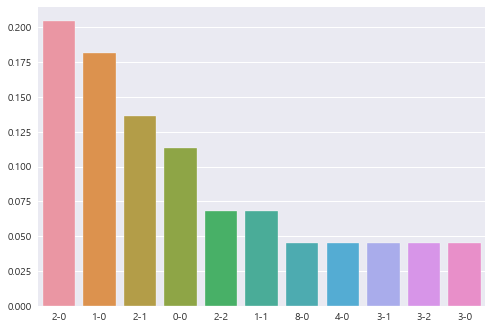

In [81]:
sns.barplot(x=score_dist.index, y=score_dist.values)